# INFO 2950 Project - Final Report 
Net IDs: tjk223, bsp73, amm643, swp42

Names: Teddy Klausner, Ben Polson, Sasha Miranda, Spencer Pettee
### Details
This file is the final report section of our final project. There are multiple sections in the notebook and they will be organized in the following format: **Introduction, Data Description, Preregistration Statement, Data Analysis, Evaluation of Signifigance, Interpretation and Conclusion, Limitations, Souce Code, and Acknowledgements.** In addition to this file we also have two appendicies. The first appendix shows our cleaning and merging of the data files. The second appedix shows other work that is not shown in this file. 

# Introduction

What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.

In this project we wanted to work with multiple data sets, so we decided explore food expenditure and internet data. The first step was to clean both data files. After both files were clean and ready to work with we merged them based on country. Another goal was discovering how factors impact internet quality by country. To do this we built a multiple regression model which told us that some of the most important factors on internet quality are 

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Description

**What are the observations (rows) and the attributes (columns)?**

We are using data about internet usage internationally and a separate dataset containing GDP and food expenditure internationally. We combined the two datasets into one where rows are countries and columns of interest from the internet dataset are gender gap in internet access, urban electricity access, rural electricity access, smartphone cost, level of web accessibility, trust in online privacy, total electricity access, internet users. The columns of interest from the other dataset are GDP, and food expenditure.

**Why was this dataset created?**

The internet data set was created to measure four categories of “The Inclusive Internet Index,” which tracks internet services in countries across the world. The four categories are affordability, availability, relevance and readiness. The index is meant for advocacy organizations, local governments and journalists. 

This dataset was created by Our World in Data, which wanted to look at the relationship between GDP per person and food expenditure per person. The data was originally sourced from the World Bank, whose goal is to help countries solve issues. They record many general statistics for nearly every country.

**Who funded the creation of the dataset?**

The internet service dataset was funded by Facebook. The data seems to be funded to support Facebook's internet.org whose mission is to bring internet access to those who do not have it. 

The World Bank funded the creation of the second dataset, and they receive funding from returns on their investments, country membership fees, and donations made by members

**What processes might have influenced what data was observed and recorded and what was not?**

The idea of finding how connected people are is more than just taking a survey of <5,000 people. This information may not be representative of the true experience people have in their country. Lastly there is the issue of having a device that connects to the internet. People may be able to afford internet access, but cannot afford the initial price of buying a device. Although the survey apparently covers 91% of the population, can we be sure of that number? 

For the GDP and food expenditure per person, they are calculated by dividing total GDP and food expenditure by population. The World Bank sources this data from other organizations that are more specific to countries or groups of countries, such as the U.S. Census Bureau. What data was recorded and what wasn’t is determined by how well these organizations sampled and surveyed the population, and also how well the population responded to these surveys.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data appears to be compiled into a single file with many different columns that measure a variety of metrics about internet service. If the data was from surveys was then compiled into countries. The data also combines some of information into categories like regions (such as North America and others). 

Similarly to the internet data, the food/GDP data was taken from survey within each country. This data was taken from these countries by the World Bank and they compiled all of it into one table.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Yes the data was collected through a survey which asked 4,953 participants from 99 countries across Asia-Pacific, the Americas, Europe, the Middle East, North Africa and Sub-Saharan Africa. Considering they took a survey they likely knew the data was being collected. The source is unclear about what the participants thought the data was for. 

People were certainly aware of this data collection, and the purpose that the participants expected the data to be used for was not specified online. We would guess that they expect it to be used for general government purposes.

**Where can your raw source data be found, if applicable? Provide a link to the raw data.** 

https://drive.google.com/file/d/1R-GW2DyhUh5zsnOQBfxtm36_PCGUV3Kn/view?usp=sharing

https://drive.google.com/file/d/11-kbLU49T1SuG5k_y8ENJqKn6eAqwlUo/view?usp=sharing

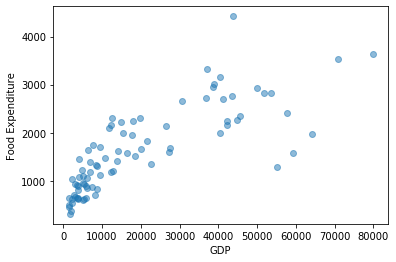

In [23]:
plt.scatter(if_data['GDP'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Food Expenditure')
plt.show()

As we can see the data points between GDP and food expenditure are correlated. From this scatter plot the association appears to be linear with many points in the range of GDP <20,000 and food expenditure <2,000. 

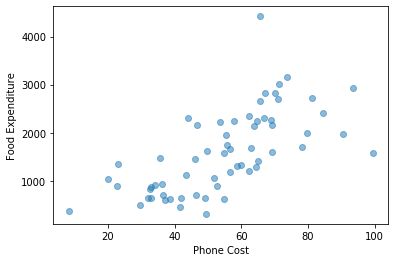

In [24]:
plt.scatter(if_data['phone_cost'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('Phone Cost')
plt.ylabel('Food Expenditure')
plt.show()

This graph shows the food expenditure as a function of food cost. Again the data appears to have a positive linear correlation with food expenditure increasing as phone cost increases.

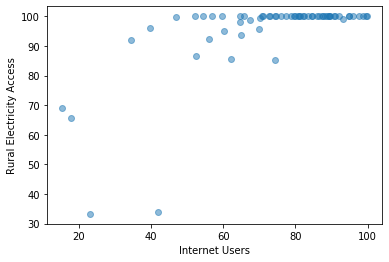

In [25]:
plt.scatter(if_data['internet_users'],if_data['rural_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Rural Electricity Access')
plt.show()

This graph shows the relationship between Internet Users and Rural Electricity Access. The plot has many of the points clustered in the top right. To gain a better idea of the relationship we can perform a log transformation to attempt to linearize the data.  

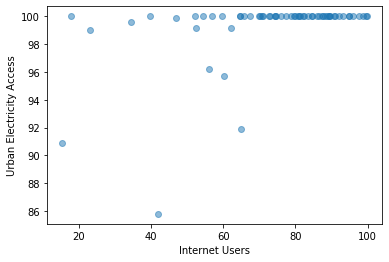

In [26]:
plt.scatter(if_data['internet_users'],if_data['urban_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Urban Electricity Access')
plt.show()

This final plot is similar to the last in how the data has many points in the top right. We can also perform a log transformation on this plot to try and linearize the data.

## Data Limitations

The data is fairly robust and does not have too many limitations. One limitation is that the data is based around the experiences in each country, but the experiences in both internet and food expenditure can be different within each region of countries. This is especially true for larger countries and countries with vast differences in wealth across  regions. 


## Questions for Review

1. We felt that some of the data analysis we will do in the future is pretty obvious. For example, it makes sense to us that people who spend more on food also tend to have better internet access. How can use the data in an interesting unique way?
2. What additional plots and analysis should we consider for our final analysis (this is a start and we plan to expand greatly? 

## Part 4: Proposed Question 2 analysis 

In [27]:
corr=if_data.corr()
corr_table=corr.loc['food_expenditure',:]
print('Correlation Coefficients of Food Expenditure and Internet Data')
print(corr_table)

Correlation Coefficients of Food Expenditure and Internet Data
gender_gap          -0.358075
urban_elec_access    0.229720
rural_elec_access    0.330072
phone_cost           0.661712
web_access           0.419633
privacy_trust       -0.212550
electric_access      0.335970
gender_gap_pt       -0.238277
internet_users       0.663592
total_population    -0.241981
GDP                  0.794216
food_expenditure     1.000000
Name: food_expenditure, dtype: float64


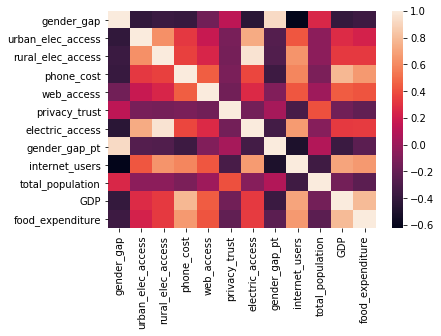

In [28]:
import seaborn as sns
sns.heatmap(if_data.corr())

Based on the correlations listed above and the heatmap, we can conclude that the gender gap and privacy trust have the strongest negative correlation while GDP, phone cost and internet users have the strongest positive correlation with food expenditure. Below are the calculated p-values in comparison to a 0.5 alpha level to determine which correlations are statistically significant. 

In [29]:
data = if_data.copy()

# check for NAN elements
print('NAN elements:')
print(data.isna().sum()) 

# check size of X before dropping NAN rows
print('\nSize of feature array before dropping: ', data.size)

# drop NAN rows
data = data.dropna()

# size of X after dropping NAN rows
print('\nSize of feature array after dropping: ', data.size)
data.shape
#X = data[['phone_cost', 'internet_users', 'electric_access']]

# dropping potential y columns, creating feature array X
#X = data.drop(['country', 'GDP', 'food_expenditure', 'total_population', 'gender_gap'], axis=1)

NAN elements:
country               0
gender_gap           22
urban_elec_access    22
rural_elec_access    22
phone_cost           22
web_access           22
privacy_trust        22
electric_access      22
gender_gap_pt        22
internet_users       22
total_population      0
GDP                   0
food_expenditure      0
dtype: int64

Size of feature array before dropping:  1092

Size of feature array after dropping:  806


(62, 13)

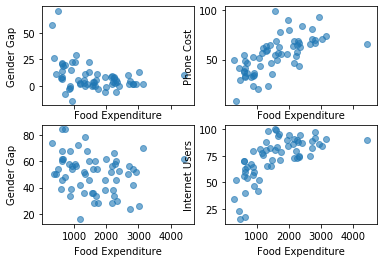

In [30]:
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True)
sc = axes[0][0].scatter(data['food_expenditure'],data['gender_gap'], alpha=.6)
axes[0][0].set_xlabel('Food Expenditure', labelpad = 5)
axes[0][0].set_ylabel('Gender Gap', labelpad = 5)

axes[0][1].scatter(data['food_expenditure'],data['phone_cost'],  alpha=.6)
axes[0][1].set_xlabel('Food Expenditure', labelpad = 5)
axes[0][1].set_ylabel('Phone Cost', labelpad = 5)

axes[1][0].scatter(data['food_expenditure'],data['privacy_trust'],  alpha=.6)
axes[1][0].set_xlabel('Food Expenditure', labelpad = 5)
axes[1][0].set_ylabel('Gender Gap', labelpad = 5)

axes[1][1].scatter(data['food_expenditure'],data['internet_users'],  alpha=.6)
axes[1][1].set_xlabel('Food Expenditure', labelpad = 5)
axes[1][1].set_ylabel('Internet Users', labelpad = 5)
plt.show()

In [31]:
#Two Sampled T test for gender gap and food expenditure 

from scipy.stats import ttest_ind
from scipy.stats import linregress
import numpy as np


food_expend = data['food_expenditure']
gendergap = data['gender_gap']

lr =linregress(food_expend, gendergap)

pval = lr.pvalue
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we do not null hypothesis")


#i think a 95% confidence interval is the mean + just std error*1.96
confidence_interval1=1.96*7.709
print(confidence_interval1)

p-value 0.004269725951199303
we reject null hypothesis
15.109639999999999


In [32]:
#Two Sampled T test for privacy_trust and food expenditure 

privacy_trust=data['privacy_trust']

lr =linregress(food_expend, privacy_trust)

pval = lr.pvalue
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we do not reject null hypothesis")

p-value 0.09720254397769232
we do not reject null hypothesis


In [33]:
#Two sampled T test for GDP and Food expenditure 
GDP=data['GDP']

lr =linregress(food_expend, GDP)

pval = lr.pvalue
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we do not reject null hypothesis")

p-value 6.105531896212624e-12
we reject null hypothesis


In [34]:
#two sampled T test for phone cost and food_expenditure 
phone_cost=data['phone_cost']

lr =linregress(food_expend, phone_cost)

pval = lr.pvalue
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we do not reject null hypothesis")

p-value 4.754270232607378e-09
we reject null hypothesis


In [35]:
#two sampled t test for internet users and food_expenditure 
internet_users=data['internet_users']

lr =linregress(food_expend, internet_users)

pval = lr.pvalue
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we do not reject null hypothesis")

p-value 4.150070738509085e-09
we reject null hypothesis


# Model Building

In this section, we are going to try to fit a model where we use the columns we picked as predictors for level of web accessability. While we know that the relationships between many of these columns and level of web accessability are not causal, we could still use them as predictors if there is a strong correlation. We are going to build the model using AIC and BIC selection. AIC (Akaike's Information Criteria) often overestimates the number of significant predictors and is best for large datasets where number of observations divided by number of candidate variables is greater than 40. Since this is not the case for our data set, we will start with BIC (Bayesian Information Criteria), which underestimates the number of significant predictors.

In [36]:
from sklearn import linear_model

X = data.drop(['country', 'web_access'], axis=1) #X is an array of all of the candidate variables
y = data['web_access'] #y is the dependent variable, web accessibility

model = linear_model.LassoLarsIC('bic').fit(X, y)

print('Coefficients:\n' + str(model.coef_))

Coefficients:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Given that all of the coefficients are zero, BIC is saying that none of the predictors are statistically significant. We will try AIC instead:

In [37]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

Coefficients:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.16543390e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.83794449e-03
 0.00000000e+00 3.29149392e-06 9.49257984e-05]

R squared: 0.23494436688426745


Most of the coefficients of significant predictors are close to zero, and the R squared value is very low. Since AIC is the more generous of the two criteria, the columns we chose arbitrarily clearly do not have a strong correlation with web accessibility. After seeing this result, we rethought about what we are really trying to do here. We realized that it did not make sense to drop columns while cleaning the dataset because some of those columns may have had a correlation with web access. Therefore, we are going to try building a model with the entire internet acessibility dataset. It is already clean other than the fact that the column names are long, but there are many columns and the long names help accurately describe what they represent, so we will leave the full dataset as is for now as you can see below.

In [38]:
full_internet_data = pd.read_csv("3i-index-data.csv", encoding='latin-1')

new_colnames_full = [c[c.find(')') + 2:].lower() for c in full_internet_data.columns]
new_colnames_full = [c.replace(' ', '_') for c in new_colnames_full]
new_colnames_full = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_colnames_full]

full_internet_data.columns = new_colnames_full

full_internet_data.head()

,s(o),ountry(roup),internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


In [39]:
X = full_internet_data.drop(['s(o)', 'ountry(roup)', 'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'], axis=1) #X is an array of all of the candidate variables
y = full_internet_data['level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'] #y is the dependent variable, web accessibility

model = linear_model.LassoLarsIC('bic').fit(X, y)

print('Coefficients:\n' + str(model.coef_))
print('\nR squared: ' + str(model.score(X,y)))

Coefficients:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04015812 0.
 0.07166296 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

R squared: 0.1294469934089938


In [40]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

Coefficients:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.40793729e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.60446042e-02  4.98340508e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.30333322e-02  0.00000000e+00
  0.00000000e+00  3.71069061e-04  0.00000000e+00  0.00000000e+00
 -1.21491943e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.03947231e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.58977357e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.13541277e-01  0.00000000e+00  0.00000000e+00  1.41328427e-01
  0.0000000

In [41]:
#find which variables are significant according to AIC criteria

coefficients = []

for i in range(len(modelA.coef_)):
    if modelA.coef_[i] != 0:
        coefficients.append(X.columns[i])

#do linear regression with only those columns as the predictors
import statsmodels.api as sm

reg12 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.833
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.814
Method:                                                          Least Squares   F-statistic:                              44.43
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    5.32e-36
Time:                                                                 19:45:06   Log-Likelihood:                         -132.71
No. Observations:                                                          119   AIC:                                      289.4
Df Residuals:                                                              107   BIC:                                      322.8
Df Model:                                                                   12                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
bandwidth_capacity_(bit/s_per_internet_user)                                             -2.878e-07   9.75e-08     -2.952      0.004   -4.81e-07   -9.45e-08
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1297      0.104      1.250      0.214      -0.076       0.335
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0215      0.020      1.067      0.288      -0.018       0.061
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0640      0.020      3.180      0.002       0.024       0.104
average_revenue_per_user_(arpu,_annualized)_(usd)                                        -3.859e-06      0.001     -0.004      0.997      -0.002       0.002
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2766      0.146     -1.889      0.062      -0.567       0.014
value_of_e-finance_(%)                                                                      -0.0150      0.006     -2.569      0.012      -0.027      -0.003
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2060      0.100      2.070      0.041       0.009       0.403
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3957      0.242      1.637      0.104      -0.083       0.875
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2142      0.081      2.656      0.009       0.054       0.374
democracy_index_(score,_0-10;_10_=_best)                                                     0.0927      0.055      1.673      0.097      -0.017       0.202
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1691      0.114      1.489      0.139      -0.056       0.394
==============================================================================
Omnibus:                        1.733   Durbin-Watson:                   1.994
Prob(Omnibus):      

In [42]:
coefficients.remove('bandwidth_capacity_(bit/s_per_internet_user)')
reg11 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.819
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.801
Method:                                                          Least Squares   F-statistic:                              44.50
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    4.72e-35
Time:                                                                 19:45:06   Log-Likelihood:                         -137.37
No. Observations:                                                          119   AIC:                                      296.7
Df Residuals:                                                              108   BIC:                                      327.3
Df Model:                                                                   11                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1334      0.107      1.243      0.217      -0.079       0.346
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0169      0.021      0.815      0.417      -0.024       0.058
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0683      0.021      3.288      0.001       0.027       0.109
average_revenue_per_user_(arpu,_annualized)_(usd)                                            0.0002      0.001      0.190      0.849      -0.002       0.002
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2066      0.150     -1.381      0.170      -0.503       0.090
value_of_e-finance_(%)                                                                      -0.0159      0.006     -2.643      0.009      -0.028      -0.004
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2095      0.103      2.033      0.044       0.005       0.414
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3890      0.250      1.555      0.123      -0.107       0.885
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.1952      0.083      2.344      0.021       0.030       0.360
democracy_index_(score,_0-10;_10_=_best)                                                     0.1171      0.057      2.066      0.041       0.005       0.229
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1117      0.116      0.965      0.337      -0.118       0.341
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.974
Skew:                           0.001   Prob(JB):                        0.614
Kurtosis:          

In [43]:
coefficients.remove('average_revenue_per_user_(arpu,_annualized)_(usd)')
reg10 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.819
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.803
Method:                                                          Least Squares   F-statistic:                              49.38
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    6.64e-36
Time:                                                                 19:45:06   Log-Likelihood:                         -137.39
No. Observations:                                                          119   AIC:                                      294.8
Df Residuals:                                                              109   BIC:                                      322.6
Df Model:                                                                   10                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1328      0.107      1.243      0.217      -0.079       0.345
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0172      0.021      0.835      0.406      -0.024       0.058
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0676      0.020      3.322      0.001       0.027       0.108
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2132      0.145     -1.472      0.144      -0.500       0.074
value_of_e-finance_(%)                                                                      -0.0164      0.005     -2.986      0.003      -0.027      -0.006
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2101      0.103      2.050      0.043       0.007       0.413
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3832      0.247      1.550      0.124      -0.107       0.873
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.1989      0.081      2.468      0.015       0.039       0.359
democracy_index_(score,_0-10;_10_=_best)                                                     0.1176      0.056      2.087      0.039       0.006       0.229
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1225      0.101      1.218      0.226      -0.077       0.322
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.998
Skew:                           0.005   Prob(JB):                        0.607
Kurtosis:                       3.448   Cond. No.                         183.
==============================================================================

Warnings:
[1] Sta

In [44]:
coefficients.remove('private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)')
reg9 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.817
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.802
Method:                                                          Least Squares   F-statistic:                              54.43
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    1.85e-36
Time:                                                                 19:45:06   Log-Likelihood:                         -138.23
No. Observations:                                                          119   AIC:                                      294.5
Df Residuals:                                                              110   BIC:                                      319.5
Df Model:                                                                    9                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0165      0.021      0.797      0.427      -0.024       0.057
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0667      0.020      3.273      0.001       0.026       0.107
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2239      0.145     -1.545      0.125      -0.511       0.063
value_of_e-finance_(%)                                                                      -0.0163      0.005     -2.958      0.004      -0.027      -0.005
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2121      0.103      2.064      0.041       0.008       0.416
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4316      0.245      1.764      0.081      -0.053       0.916
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2055      0.081      2.550      0.012       0.046       0.365
democracy_index_(score,_0-10;_10_=_best)                                                     0.1225      0.056      2.173      0.032       0.011       0.234
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1450      0.099      1.462      0.146      -0.051       0.342
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.076
Skew:                           0.046   Prob(JB):                        0.584
Kurtosis:                       3.457   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
coefficients.remove('internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)')
reg8 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.816
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.802
Method:                                                          Least Squares   F-statistic:                              61.36
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    3.12e-37
Time:                                                                 19:45:06   Log-Likelihood:                         -138.57
No. Observations:                                                          119   AIC:                                      293.1
Df Residuals:                                                              111   BIC:                                      315.4
Df Model:                                                                    8                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0648      0.020      3.205      0.002       0.025       0.105
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2362      0.144     -1.641      0.104      -0.521       0.049
value_of_e-finance_(%)                                                                      -0.0165      0.005     -3.005      0.003      -0.027      -0.006
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2103      0.103      2.051      0.043       0.007       0.414
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4370      0.244      1.790      0.076      -0.047       0.921
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2107      0.080      2.627      0.010       0.052       0.370
democracy_index_(score,_0-10;_10_=_best)                                                     0.1266      0.056      2.259      0.026       0.016       0.238
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1551      0.098      1.580      0.117      -0.039       0.350
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.746
Skew:                           0.040   Prob(JB):                        0.689
Kurtosis:                       3.379   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
coefficients.remove('eiu_business_environment_rankings_(score,_1-10,_10_=_high)')
reg7 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.811
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.800
Method:                                                          Least Squares   F-statistic:                              68.85
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    1.22e-37
Time:                                                                 19:45:06   Log-Likelihood:                         -139.90
No. Observations:                                                          119   AIC:                                      293.8
Df Residuals:                                                              112   BIC:                                      313.2
Df Model:                                                                    7                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0731      0.020      3.724      0.000       0.034       0.112
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.0888      0.110     -0.805      0.422      -0.307       0.130
value_of_e-finance_(%)                                                                      -0.0152      0.005     -2.790      0.006      -0.026      -0.004
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2376      0.102      2.335      0.021       0.036       0.439
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4535      0.246      1.847      0.067      -0.033       0.940
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2739      0.070      3.916      0.000       0.135       0.413
democracy_index_(score,_0-10;_10_=_best)                                                     0.1768      0.046      3.805      0.000       0.085       0.269
==============================================================================
Omnibus:                        1.103   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.648
Skew:                           0.064   Prob(JB):                        0.723
Kurtosis:                       3.338   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
coefficients.remove('availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)')
reg6 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.810
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.800
Method:                                                          Least Squares   F-statistic:                              80.46
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    1.79e-38
Time:                                                                 19:45:06   Log-Likelihood:                         -140.24
No. Observations:                                                          119   AIC:                                      292.5
Df Residuals:                                                              113   BIC:                                      309.2
Df Model:                                                                    6                                                  
Covariance Type:                                                     nonrobust                                                  
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                   0.0723      0.020      3.693      0.000       0.034       0.111
value_of_e-finance_(%)                                                            -0.0174      0.005     -3.637      0.000      -0.027      -0.008
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                      0.2111      0.096      2.196      0.030       0.021       0.402
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)     0.4067      0.238      1.707      0.091      -0.065       0.879
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                  0.2659      0.069      3.847      0.000       0.129       0.403
democracy_index_(score,_0-10;_10_=_best)                                           0.1748      0.046      3.773      0.000       0.083       0.267
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.554
Skew:                           0.123   Prob(JB):                        0.758
Kurtosis:                       3.226   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
coefficients.remove('technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)')
reg5 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.805
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.797
Method:                                                          Least Squares   F-statistic:                              94.39
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    7.28e-39
Time:                                                                 19:45:06   Log-Likelihood:                         -141.76
No. Observations:                                                          119   AIC:                                      293.5
Df Residuals:                                                              114   BIC:                                      307.4
Df Model:                                                                    5                                                  
Covariance Type:                                                     nonrobust                                                  
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)      0.0762      0.020      3.884      0.000       0.037       0.115
value_of_e-finance_(%)                                               -0.0170      0.005     -3.532      0.001      -0.027      -0.007
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)         0.2616      0.092      2.836      0.005       0.079       0.444
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)     0.2751      0.069      3.959      0.000       0.137       0.413
democracy_index_(score,_0-10;_10_=_best)                              0.2047      0.043      4.734      0.000       0.119       0.290
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.150   Prob(JB):                        0.566
Kurtosis:                       3.373   Cond. No.                         67.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(coefficients)

['mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)', 'value_of_e-finance_(%)', 'support_for_digital_literacy_(qualitative_rating_0-3,_3=best)', 'government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)', 'democracy_index_(score,_0-10;_10_=_best)']


In [50]:
newNames = {'mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)':'Cell_Cost', 'value_of_e-finance_(%)':'E-Finance_Value','support_for_digital_literacy_(qualitative_rating_0-3,_3=best)':'Support_For_Dig_Lit','government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)':'Govt_Promote_5g','democracy_index_(score,_0-10;_10_=_best)':'Democracy_Index'}
full_internet_data = full_internet_data.rename(columns=newNames)
coefficients = list(newNames.values())

In [51]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2).fit_transform(full_internet_data[coefficients])
interaction = pd.DataFrame(interaction)
full_internet_data[coefficients].head()

,Cell_Cost,E-Finance_Value,Support_For_Dig_Lit,Govt_Promote_5g,Democracy_Index
0,2.04,32.0,1.0,0.0,3.5
1,1.12,62.0,3.0,0.0,7.0
2,0.50,44.0,3.0,3.0,9.1
3,0.16,50.0,3.0,3.0,8.3
4,1.38,45.0,1.0,0.0,2.6


In [52]:
interaction.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,2.04,32.0,1.0,0.0,3.5,4.1616,65.28,2.04,0.00,...,1024.0,32.0,0.0,112.0,1.0,0.0,3.5,0.0,0.0,12.25
1,1.0,1.12,62.0,3.0,0.0,7.0,1.2544,69.44,3.36,0.00,...,3844.0,186.0,0.0,434.0,9.0,0.0,21.0,0.0,0.0,49.00
2,1.0,0.50,44.0,3.0,3.0,9.1,0.2500,22.00,1.50,1.50,...,1936.0,132.0,132.0,400.4,9.0,9.0,27.3,9.0,27.3,82.81
3,1.0,0.16,50.0,3.0,3.0,8.3,0.0256,8.00,0.48,0.48,...,2500.0,150.0,150.0,415.0,9.0,9.0,24.9,9.0,24.9,68.89
4,1.0,1.38,45.0,1.0,0.0,2.6,1.9044,62.10,1.38,0.00,...,2025.0,45.0,0.0,117.0,1.0,0.0,2.6,0.0,0.0,6.76


In [53]:
internet_data_SQ = full_internet_data.copy()
coefficients_SQ = coefficients.copy()

In [54]:
internet_data_SQ['Cell_Cost_SQ'] = interaction[6]
internet_data_SQ['E-Finance_Value_SQ'] = interaction[11]
internet_data_SQ['Support_For_Dig_Lit_SQ'] = interaction[15]
internet_data_SQ['Govt_Promote_5g_SQ'] = interaction[18]
internet_data_SQ['Democracy_Index_SQ'] = interaction[20]

In [55]:
coefficients_SQ.extend(['Cell_Cost_SQ','E-Finance_Value_SQ','Support_For_Dig_Lit_SQ','Govt_Promote_5g_SQ','Democracy_Index_SQ'])

In [56]:
regSQ5 = sm.OLS(y, internet_data_SQ[coefficients_SQ]).fit()
regSQ5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.813
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.796
Method:                                                          Least Squares   F-statistic:                              47.32
Date:                                                         Mon, 23 Nov 2020   Prob (F-statistic):                    4.31e-35
Time:                                                                 19:45:07   Log-Likelihood:                         -139.47
No. Observations:                                                          119   AIC:                                      298.9
Df Residuals:                                                              109   BIC:                                      326.7
Df Model:                                                                   10                                                  
Covariance Type:                                                     nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Cell_Cost                  0.0016      0.072      0.023      0.982      -0.142       0.145
E-Finance_Value           -0.0332      0.022     -1.541      0.126      -0.076       0.009
Support_For_Dig_Lit        0.3744      0.406      0.922      0.358      -0.430       1.179
Govt_Promote_5g           -0.1690      0.294     -0.575      0.566      -0.751       0.413
Democracy_Index            0.4632      0.218      2.124      0.036       0.031       0.896
Cell_Cost_SQ               0.0035      0.004      0.918      0.360      -0.004       0.011
E-Finance_Value_SQ         0.0001      0.000      0.664      0.508      -0.000       0.001
Support_For_Dig_Lit_SQ    -0.0343      0.108     -0.318      0.751      -0.248       0.179
Govt_Promote_5g_SQ         0.1479      0.093      1.590      0.115      -0.037       0.332
Democracy_Index_SQ        -0.0244      0.019     -1.253      0.213      -0.063       0.014
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.081
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       3.120   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Take squared columns out then add interaction terms and run regression
- finalize model with significant interaction terms
- plot multivariable regression maybe
- write it uppp

Since the squared values all increased the p values, we shall re remove them.

In [61]:
internet_data_inter = internet_data.copy()
coefficients_inter = coefficients.copy()

In [62]:
for i in interaction.columns:
    if i not in [0, 1,11,15,18,20]:
        internet_data_inter['interaction ' + str(i)] = interaction[i]
        coefficients_inter.append('interaction ' + str(i))

In [68]:
internet_data_inter.columns

#regSQ5 = sm.OLS(y, internet_data_inter[coefficients_inter]).fit()
#regSQ5.summary()

Index(['country', 'gender_gap_in_internet_access_(%_difference)',
       'urban_electricity_access_(%_of_population)',
       'rural_electricity_access_(%_of_population)',
       'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)',
       'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)',
       'trust_in_online_privacy_(%)',
       'total_electricity_access_(%_of_population)',
       'internet_access_gender_gap_(difference_in_percentage_points)',
       'internet_users_(percent_of_population)_(%_of_population)',
       'interaction 2', 'interaction 3', 'interaction 4', 'interaction 5',
       'interaction 6', 'interaction 7', 'interaction 8', 'interaction 9',
       'interaction 10', 'interaction 12', 'interaction 13', 'interaction 14',
       'interaction 16', 'interaction 17', 'interaction 19'],
      dtype='object')